## Módulo 4 Unidad 2: Práctica 13 - Agrupamiento jerárquico.

### 1. Descripción del conjunto de datos.
En primer lugar vamos a cargar los datos de nuestro archivo Mall_Customers.csv en un dataframe de Pandas para proceder a su análisis.

In [2]:
# importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering # librería para el clústering de agrupamiento aglomerativo

df = pd.read_csv('Mall_Customers.csv', sep=',') # creamos dataframe a partir de la lectura del archivo

In [4]:
df.head(10) # Mostramos las 10 primeras filas del dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.shape # vemos la forma de nuestro dataframe (filas o registros y columnas o atributos)

(200, 5)

In [8]:
df.info() # Analizamos la información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.nunique() # Análisis de valores únicos

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [12]:
df.describe() # Mostramos las variables numéricas

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.describe(include=['O']) # Mostramos las variables categóricas

,Genre
count,200
unique,2
top,Female
freq,112


In [16]:
df['Genre'].value_counts() # analizamos el número de registro según el género

Genre
Female    112
Male       88
Name: count, dtype: int64

**Conclusiones:** se trata de un conjunto de datos con tan solo 200 registros y 5 características que describen datos de clientes de un centro comercial y sus comportamientos de compra. No contiene ningún valor nulo. Las variables son las siguientes:

- Variables categóricas:
    - Genre: variable que representa el género del cliente con dos valores posibles: 'Female' (56% de los registros) y 'Male' (44% de los registros). Esta variable se puede decir que está razonablemente balanceada.
- Variables numéricas (todas tipo entero):
    - CustomerID: variable que representa el número de identificación del cliente (valores de 1 a 200).
    - Age: representa la edad del cliente. La edad promedio del cliente es aproximadamente 39 años y todos los clientes son mayores de 18 años.
    - Annnual Income (k$): representa los ingresos anuales del cliente en cuestión en miles de dólares.
    - Spending Score (1-100): representa el índice de gasto de un cliente en el centro comercial. Esta medida está valorado de 1 a 100. La media de esta puntuación de gastos de los clientes en nuestor conjunto de datos es de 50.20.

### 2. Selección de los datos.
**Selecciona únicamente las columnas de ingresos anuales e índice de gastos, que serán las variables clave para el análisis.**

Seleccionamos las columnas de ingresos anuales e índice de gastos, ya que la idea es agrupar clientes en función de su similitud. Estas las convertimos de un dataframe de pandas a un array de numpy, ya que la función 'linkage' requiere unn array de 2 dimensiones (también puede aceptar matrices), donde cada fila es una observación y cada columna una característica. Una vez seleccionados los datos, los escalamos, ya que el algoritmo que vamos a usar, el agrupamiento jerárquico aglomerativo, trabaja con la distancia euclidiana, por lo que es sensible a la magnitud de las variables.

In [20]:
# Seleccionamos las columnas para entrenar nuestro modelo y lo convertimos a un array de numpy
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A continuación, la función linkage construye una matriz de enlace que obtiene la información de cómo se agrupan los datos jerárquicamente. Se ha optado por el método de enlace 'ward', el cual minimiza la varianza dentro de los clústeres.

In [23]:
linked = linkage(X_scaled, method='ward') # Usamos la función linkage para construir la matriz de enlace

### 3. Generación de gráfico jerárquico.
**Usa la función dendrogram de la biblioteca scipy para generar un gráfico que muestra cómo se agrupan los clientes de manera
jerárquica. El dendrograma permitirá visualizar la estructura de los datos y determinar el número óptimo de clústeres.**

A continuación generamos un dendrograma, el cual nos mostrará como los clientes se agrupan jerárquicamente. Para ello usamos la función dendrogram de la biblioteca scipy. Se comprobar primero los resultados, se han añadido unas línes de posibles corte para la selección del número de clústeres.

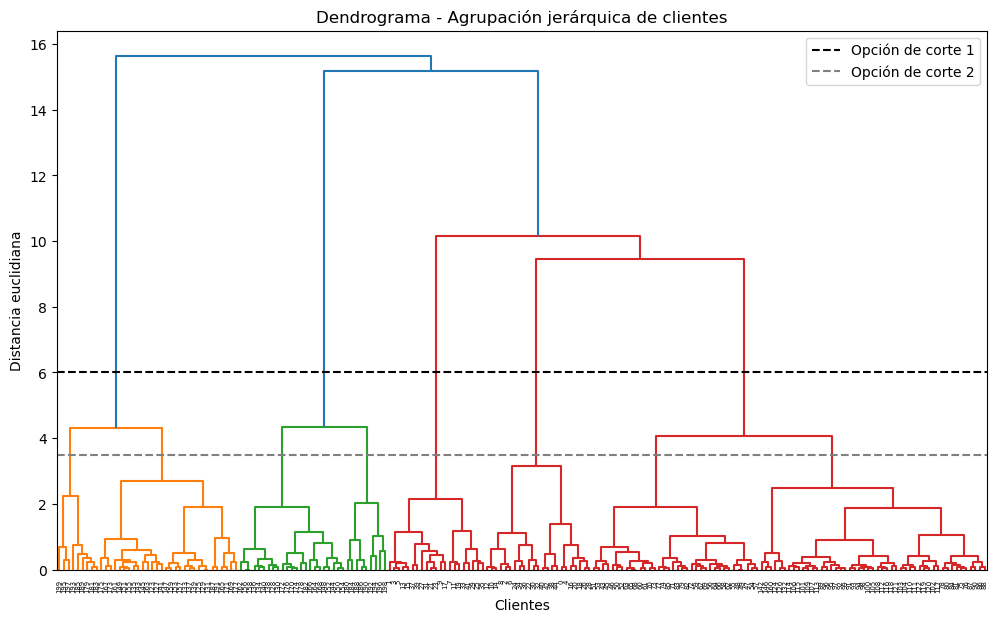

In [31]:
# Creamos un gráfico para mostrar la agrupación jerárquica
plt.figure(figsize=(12, 7))
dendrogram(linked) # creamos dendrograma a partir de array de numpy 'linked' obtenido anteriormente
# creamos unas líneas de corte posible tras haber visualizado el gráfico previamente
plt.axhline(y=6, color='black', linestyle='--', label='Opción de corte 1')  
plt.axhline(y=3.5, color='grey', linestyle='--', label='Opción de corte 2')
plt.title('Dendrograma - Agrupación jerárquica de clientes')
plt.xlabel('Clientes') # en el eje x tendremos los clientes
plt.ylabel('Distancia euclidiana') # en el eje y tendremos la distancia euclidiana tras el escalado
plt.legend(loc="upper right")
plt.show()

**Conclusiones:** analizando el dendrograma que nos muestra la agrupación jerárquica de clientes, en principio, la opción de corte ideal sería la marcada por la línea de negra, que nos daría una total de 5 clústeres. Si apuramos un poco más buscando una mayor segregación de los datos, podemos optar por la línea  de corte gris, que nos daría 8 clústeres, pero la separación entre clústeres estará mucho más ajustada y podría existir solapamiento. La mejor manera de decidir es creando un diagrama de dispersión para los distintos números de clústeres, lo cual nos ayudará a concluir cual puede ser el número de clústeres más óptimo según nuestras necesidades.

### 4. Aplicación del modelo de agrupamiento aglomerativo.
**Realiza el agrupamiento utilizando el algoritmo de agrupamiento jerárquico aglomerativo.**
Vamos a aplicar el modelo de agrupamiento jerárquico aglomerativo. Para ello, como se comentó en el apartado anterior, vamos a utilzar un rango de clústeres entre 5 y 8 para ver cual sería el resultado más óptimo.

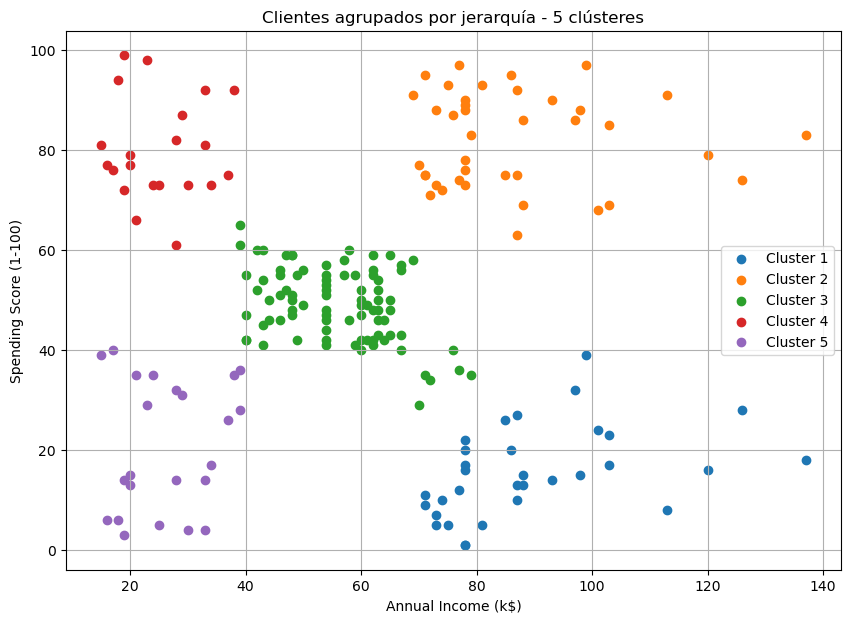

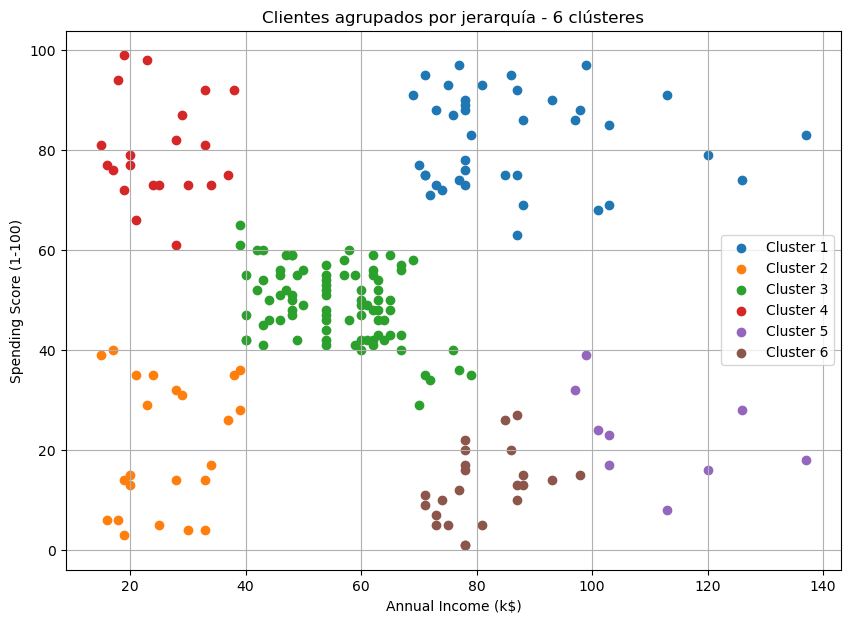

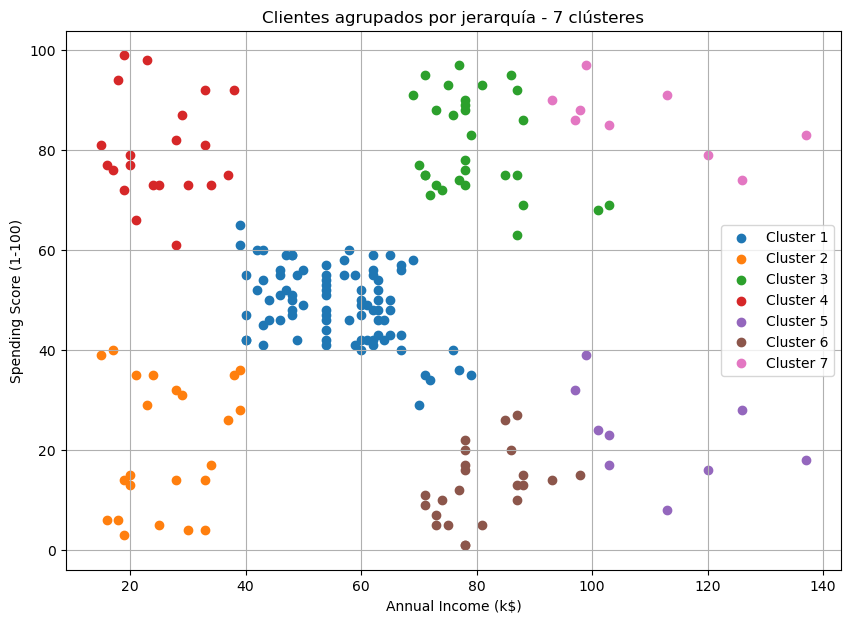

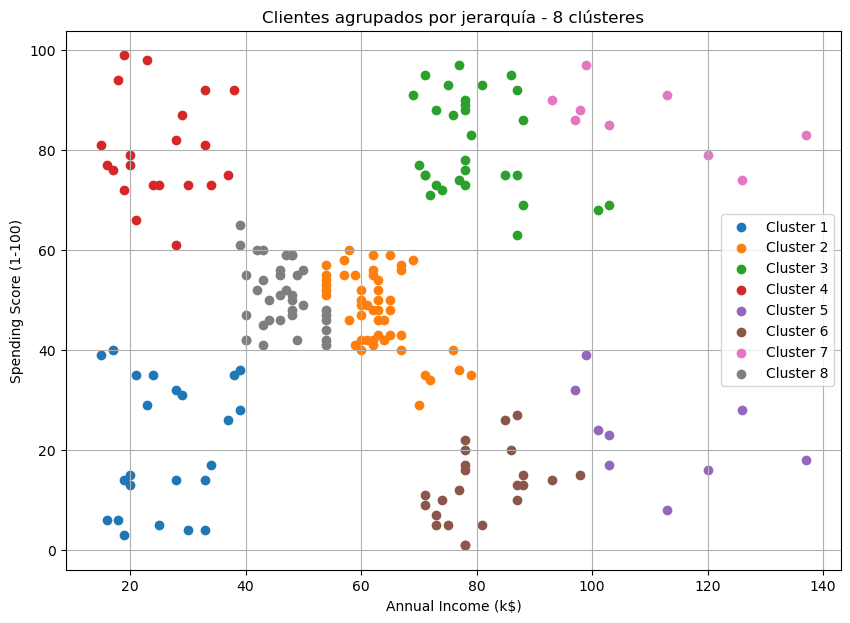

In [35]:
cluster_options = [5, 6, 7, 8]  # Opciones de número de clústeres a probar

for n_clusters in cluster_options:
    # Creamos el modelo de agrupamiento con n_clústeres y linkage tipo ward
    model_hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') 
    y_model_hc = model_hc.fit_predict(X_scaled)  # Entrenamos el modelo con los datos escalados

    # Visualizamos los resultados generando un gráfico de dispersión
    plt.figure(figsize=(10, 7))
    for i in range(n_clusters):
        plt.scatter(X[y_model_hc == i, 0], X[y_model_hc == i, 1], label=f'Cluster {i + 1}')
    
    plt.title(f'Clientes agrupados por jerarquía - {n_clusters} clústeres')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Conclusiones:**
Vamos a analizar los gráficos según su número de clústeres:
- 5 clústeres: la agrupación obtenido es buena. Existe alguna observación que se encuentra en los bordes de los clústeres que se que están al límite de pertenecer a otro clúster, por ejemplo, entre el clúster 3 (verde) y clúster 4 (rojo) o entre 3 (verde) y 5 (morado). También existen valores atípicos que son poco frecuentes, como son clientes con ingresos muy altos (por en encima de 110k$), los cuales pueden generar problemas a la hora del agrupamiento.
- 6 clústeres: realiza un agrupamiento similar de clústeres que en el caso anterior, pero con la diferencia de que lo que era el clúster 1 (azul) en el agrupamiento de 5, ahora son dos clústeres (5 morado y 6 marrón). 
- 7 clústeres: partiendo del gráfico de 6 clústeres, añade un división más en el clúster de la parte superior derecha (cluster 1 azul) que se divide en dos clústeres (3 verde y 7 rosa). Con estas dos últimas divisiones, quizás hayamos conseguido aislar esos valores atípico de cliente con ingresos muy altos que citábamos en el primero punto.
- 8 clústeres: añadir un octavo clúster, ha hecho que un grupo que era bastante uniforme como el clúster central (cluster 3 verde en el primer gráfico) lo haya divido en dos y esté prácticamente unidos, lo que hace que esta división no sea buena y el modelo empieza a crear divisiones en grupos relativamente homogéneos.

Podemos concluir que la división más óptima es para 5 clústeres, y si queremos un división algo más detallada lo ideal ya sería 7, que consigue crear buenos agrupamiento. El modelo a partir de 8 clústeres no consigue buenos resultados.

### 5. Análisis de posibles mejoras.
Aunque la práctica no lo solicite, sabemos que los modelo de agrupamiento jerárquico se basan en distancias y no suelen ser algoritmos robustos frente a valores extremos. Por esta razón, vamos a estudiar si eliminamos esos valores atípicos que hemos detectado en los gráficos del apartado anterior. Vamos a centrarnos principalmente en los clientes con ingresos mayores a 110k$ al año, los cuales eliminaremos.

In [42]:
# Filtramos nuestro dataframe eliminando los clientes con ingresos mayores a 110k
df_cleaned = df[df["Annual Income (k$)"] <= 110]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              192 non-null    int64 
 1   Genre                   192 non-null    object
 2   Age                     192 non-null    int64 
 3   Annual Income (k$)      192 non-null    int64 
 4   Spending Score (1-100)  192 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ KB


Vemos que se han eliminado un total de 8 muestras, lo que representa un 4% del total de los datos. Ahora vamos a volver a entrenar el modelo y analizar los agrupamientos.

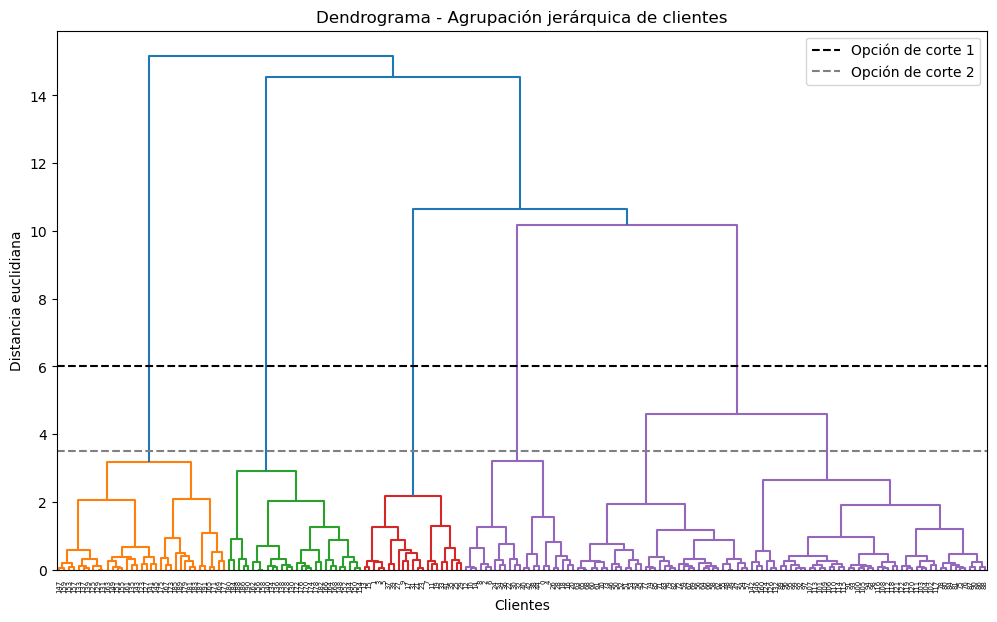

In [45]:
# Seleccionamos las columnas para entrenar nuestro modelo y lo convertimos a un array de numpy
X = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy() # Usamos nuestro dataframe filtrado

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward') # usamos la función linkage para construir la matriz de enlace

# Creamos un gráfico para mostrar la agrupación jerárquica
plt.figure(figsize=(12, 7))
dendrogram(linked) # creamos dendrograma a partir de array de numpy 'linked' obtenido anteriormente
plt.axhline(y=6, color='black', linestyle='--', label='Opción de corte 1')  # creamos una línea de corte posible
plt.axhline(y=3.5, color='grey', linestyle='--', label='Opción de corte 2')  # creamos una línea de corte posible
plt.title('Dendrograma - Agrupación jerárquica de clientes')
plt.xlabel('Clientes') # en el eje x tendremos los clientes
plt.ylabel('Distancia euclidiana') # en el eje y tendremos la distancia euclidiana tras el escalado
plt.legend(loc="upper right")
plt.show()

**Conclusiones:** analizando el dendrograma, la opción ideal de clúster es 5, la representada por la línea negra. Dividir en 6 clústeres (línea gris), también lo podemos comprobar, aunque su división ya es más compleja.

Vamos a probar para 5, 6 y 7 clústeres para ver los resultados.

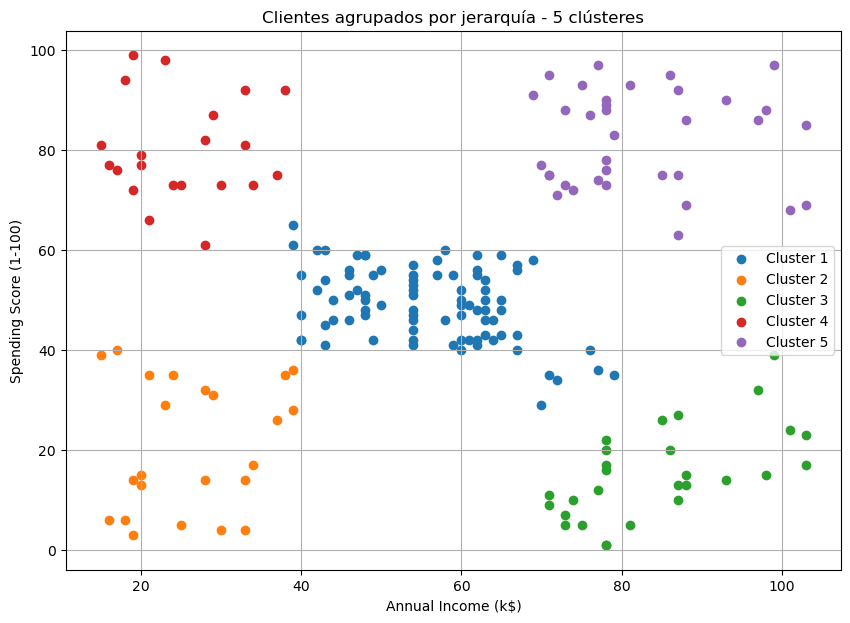

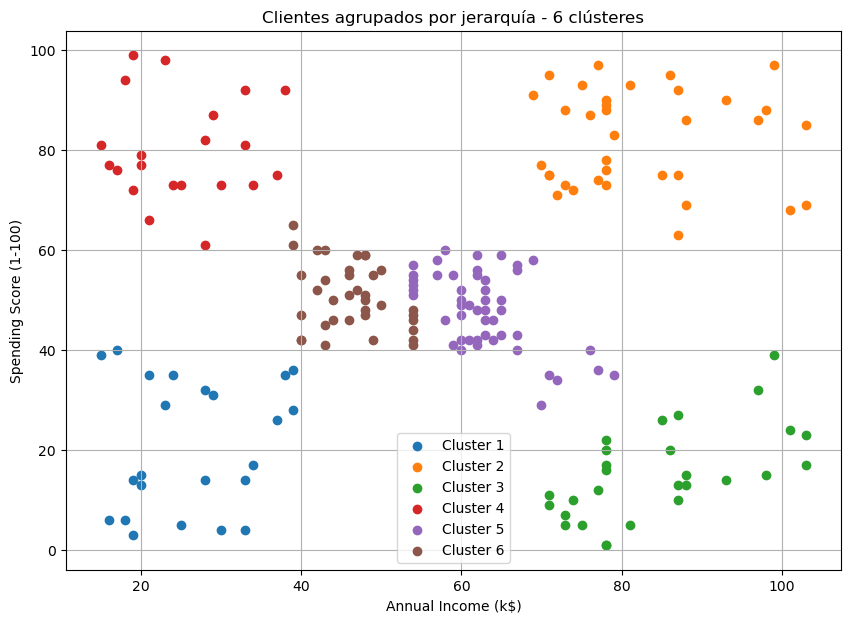

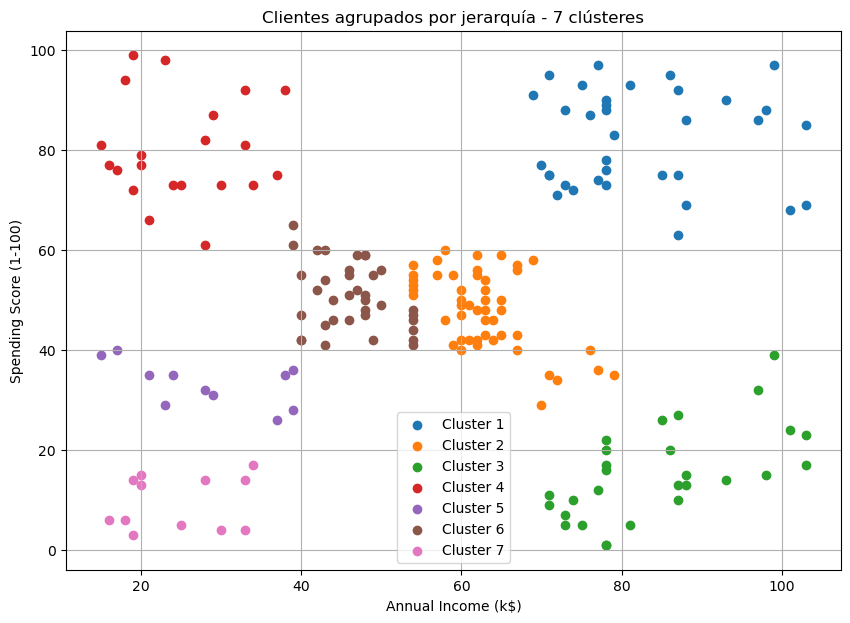

In [48]:
cluster_options = [5, 6, 7]  # Opciones de número de clústeres a probar

for n_clusters in cluster_options:
    # Creamos el modelo de agrupamiento con n_clústeres y linkage tipo ward
    model_hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') 
    y_model_hc = model_hc.fit_predict(X_scaled)  # Entrenamos el modelo con los datos escalados

    # Visualizamos los resultados generando un gráfico de dispersión
    plt.figure(figsize=(10, 7))
    for i in range(n_clusters):
        plt.scatter(X[y_model_hc == i, 0], X[y_model_hc == i, 1], label=f'Cluster {i + 1}')
    
    plt.title(f'Clientes agrupados por jerarquía - {n_clusters} clústeres')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Conclusiones:** la división más óptima era la esperada, la de 5 clústeres, ya que consigue grupos muy homogéneos y bien agrupados y separados de otros clústeres, cosa que no ocurre para 6 o 7 clústeres. También podemos observar, que eliminando los valores atípicos de ingresos anuales superiores a 110k$ hemos conseguido una agrupación similar a la de 5 clústeres del apartado anterior, pero con la diferencia de que los clústeres de la parte superior derecha (clúster 5 morado) y parte inferior derecha (clúster 3 verde) presentan una menor dispersión, consiguiendo que el agrupamiento sea más homogéneo.